In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import seaborn as sns; sns.set_theme()
import avs_risk_kit as ark

In [7]:
RISKY_ASSET = ['F', 'TSLA', 'M', 'MSFT', 'MMM', 'T', 'ATVI', 'GOOGL', 'AMZN', 'AAPL', 
               'CAT', 'CSCO', 'C', 'DD', 'FDX', 'GM' ]
START_DATE = '2017-10-01'
END_DATE = '2022-10-01'

In [8]:
df = yf.download(RISKY_ASSET,
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True)

[*********************100%***********************]  16 of 16 completed


In [9]:
r = df['Adj Close'].pct_change().dropna()
r.name = 'asset_returns'

In [5]:
r.head()

,AAPL,AMZN,ATVI,C,CAT,CSCO,DD,F,FDX,GM,GOOGL,MMM,MSFT,T,TSLA,TWTR
Date,,,,,,,,,,,,,,,,
2017-10-03,0.004356,-0.002179,0.000947,0.004471,0.006334,0.002963,-0.000852,0.020678,-0.014713,0.030842,0.004765,0.008507,-0.004691,0.009460,0.019354,0.029257
2017-10-04,-0.006473,0.008724,-0.012924,-0.000944,0.009800,-0.003576,0.001279,-0.003242,-0.007534,0.007595,-0.005452,0.009088,0.005790,0.000507,0.019733,0.009096
2017-10-05,0.012445,0.015951,0.007345,0.022414,-0.002683,0.004486,0.007381,-0.004065,0.001310,0.001599,0.019043,-0.000693,0.017138,0.000253,0.000901,0.028169
2017-10-06,-0.000579,0.008900,0.002536,-0.001057,0.004193,0.004763,0.003523,0.004898,-0.003655,0.024629,0.008577,0.000693,0.000395,-0.006979,0.004362,-0.021918
2017-10-09,0.003477,0.001425,-0.032727,-0.003305,-0.000394,0.000297,0.006459,0.002437,-0.000725,0.008903,-0.001338,0.000739,0.003816,-0.007515,-0.039061,-0.010084


In [6]:
er = ark.annualize_rets(r["2017":"2022"], 252)
cov = r["2017":"2022"].cov()*252

In [7]:
er

AAPL     0.305694
AMZN     0.187296
ATVI     0.038752
C       -0.080654
CAT      0.082822
CSCO     0.066341
DD      -0.110829
F        0.022924
FDX     -0.068369
GM      -0.033082
GOOGL    0.146330
MMM     -0.094056
MSFT     0.271883
T       -0.047683
TSLA     0.635319
TWTR     0.207691
dtype: float64

In [8]:
cov

,AAPL,AMZN,ATVI,C,CAT,CSCO,DD,F,FDX,GM,GOOGL,MMM,MSFT,T,TSLA,TWTR
AAPL,0.105624,0.073077,0.048316,0.058152,0.045385,0.055854,0.053024,0.050147,0.055164,0.054204,0.067513,0.039129,0.074162,0.028919,0.096315,0.071755
AMZN,0.073077,0.120472,0.050919,0.042158,0.038553,0.047091,0.039711,0.039016,0.052170,0.042616,0.070973,0.029016,0.074193,0.018668,0.093573,0.074518
ATVI,0.048316,0.050919,0.123711,0.025278,0.028072,0.035536,0.023501,0.014017,0.032857,0.019645,0.045709,0.020878,0.050125,0.014695,0.054190,0.052202
C,0.058152,0.042158,0.025278,0.146541,0.080223,0.059142,0.084847,0.093138,0.078836,0.102145,0.056321,0.057554,0.055498,0.052654,0.072525,0.067320
CAT,0.045385,0.038553,0.028072,0.080223,0.107849,0.049346,0.075016,0.073314,0.066721,0.075431,0.046500,0.056997,0.043937,0.038676,0.047998,0.043332
CSCO,0.055854,0.047091,0.035536,0.059142,0.049346,0.083394,0.052816,0.047632,0.052585,0.050991,0.050393,0.043268,0.055979,0.033479,0.052962,0.050330
DD,0.053024,0.039711,0.023501,0.084847,0.075016,0.052816,0.125963,0.080171,0.065275,0.088722,0.049028,0.055294,0.049112,0.041145,0.060476,0.049283
F,0.050147,0.039016,0.014017,0.093138,0.073314,0.047632,0.080171,0.169814,0.069056,0.130276,0.048482,0.049842,0.045601,0.044609,0.084129,0.058541
FDX,0.055164,0.052170,0.032857,0.078836,0.066721,0.052585,0.065275,0.069056,0.139906,0.074653,0.052690,0.053257,0.052050,0.035564,0.068749,0.056689
GM,0.054204,0.042616,0.019645,0.102145,0.075431,0.050991,0.088722,0.130276,0.074653,0.170287,0.057737,0.051749,0.052271,0.044060,0.090213,0.067520


In [9]:
corr = r["2017":"2022"].corr()

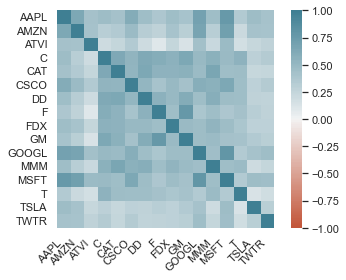

In [10]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

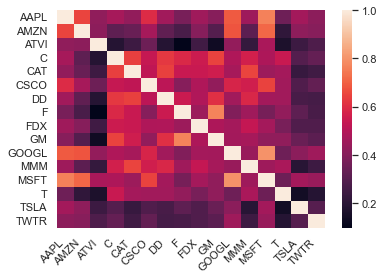

In [11]:
ax = sns.heatmap(
    corr,)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:xlabel='Volatility'>

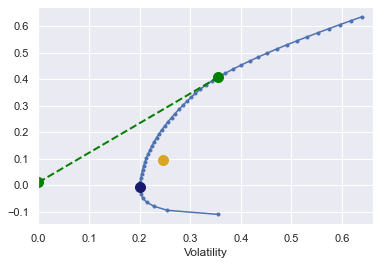

In [12]:
ark.plot_ef(50, er, cov, show_cml=True, riskfree_rate=0.01, show_ew=True, show_gmv=True)

In [13]:
ark.sharpe_ratio(r, 0.01, 252)

AAPL     0.900853
AMZN     0.505764
ATVI     0.080932
C       -0.234484
CAT      0.219551
CSCO     0.193169
DD      -0.337094
F        0.031045
FDX     -0.207461
GM      -0.103380
GOOGL    0.447209
MMM     -0.386164
MSFT     0.865027
T       -0.225509
TSLA     0.967438
TWTR     0.369877
dtype: float64

In [14]:
ark.msr(0.01, er, cov).round(3)

array([0.397, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.27 , 0.   , 0.333, 0.   ])

In [15]:
ark.gmv(cov).round(3)

array([0.   , 0.101, 0.168, 0.   , 0.   , 0.039, 0.   , 0.   , 0.   ,
       0.   , 0.042, 0.252, 0.   , 0.396, 0.   , 0.002])

In [16]:
ark.drawdown(r['AAPL'])

,Wealth,Previous Peak,Drawdown
Date,,,
2017-10-03,1004.355853,1004.355853,0.000000
2017-10-04,997.854530,1004.355853,-0.006473
2017-10-05,1010.272333,1010.272333,0.000000
2017-10-06,1009.687176,1010.272333,-0.000579
2017-10-09,1013.198012,1013.198012,0.000000
...,...,...,...
2022-09-26,4131.370713,4966.849482,-0.168211
2022-09-27,4158.498236,4966.849482,-0.162749
2022-09-28,4105.886815,4966.849482,-0.173342


<AxesSubplot:xlabel='Date'>

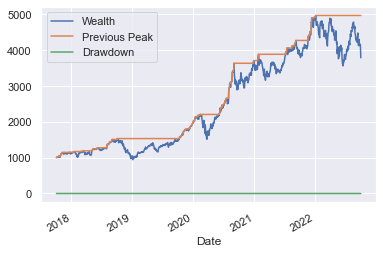

In [17]:
ark.drawdown(r['AAPL']).plot()

In [18]:
ark.drawdown(r['AAPL']).min()

Wealth            941.704050
Previous Peak    1004.355853
Drawdown           -0.385159
dtype: float64

In [19]:
ark.drawdown(r['AAPL']).idxmin()

Wealth          2019-01-03
Previous Peak   2017-10-03
Drawdown        2019-01-03
dtype: datetime64[ns]

In [20]:
ark.minimize_vol(0.1, er, cov)

array([9.48709804e-02, 5.81620714e-02, 1.20477595e-01, 0.00000000e+00,
       5.10352498e-02, 1.34039046e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.60615097e-17, 9.07475423e-02,
       1.75096641e-01, 3.49009777e-01, 4.23019531e-02, 4.89428596e-03])

In [21]:
ark.optimal_weights(10, er, cov)

[array([2.99101353e-16, 0.00000000e+00, 3.90420618e-16, 0.00000000e+00,
        3.48194332e-16, 6.47074744e-18, 9.99999995e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.95389462e-16, 5.14089831e-09,
        0.00000000e+00, 0.00000000e+00, 7.12862344e-16, 0.00000000e+00]),
 array([0.00000000e+00, 7.48636211e-02, 1.79394909e-01, 7.20079649e-18,
        0.00000000e+00, 1.15581707e-02, 5.33617441e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.82581350e-04, 3.12884672e-01,
        0.00000000e+00, 4.14979872e-01, 2.20340375e-17, 0.00000000e+00]),
 array([4.64982834e-02, 8.02280542e-02, 1.40062931e-01, 3.40846058e-18,
        1.96104648e-02, 2.88308847e-02, 1.33085817e-17, 0.00000000e+00,
        2.08437868e-17, 0.00000000e+00, 8.50317106e-03, 1.61708292e-01,
        1.12357881e-01, 3.70617336e-01, 2.64403822e-02, 5.14231906e-03]),
 array([1.35743593e-01, 3.74151870e-02, 1.02751025e-01, 0.00000000e+00,
        7.63993562e-02, 1.70886119e-03, 1.11808349e-19, 0.

In [22]:
optimal_weigth=pd.DataFrame((ark.optimal_weights(10, er, cov)), columns=RISKY_ASSET)
optimal_weigth

,F,TSLA,TWTR,MSFT,MMM,T,ATVI,GOOGL,AMZN,AAPL,CAT,CSCO,C,DD,FDX,GM
0,2.991014e-16,0.000000e+00,3.904206e-16,0.000000e+00,3.481943e-16,6.470747e-18,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.953895e-16,5.140898e-09,0.000000e+00,0.000000e+00,7.128623e-16,0.000000e+00
1,0.000000e+00,7.486362e-02,1.793949e-01,7.200796e-18,0.000000e+00,1.155817e-02,5.336174e-03,0.000000e+00,0.000000e+00,0.000000e+00,9.825813e-04,3.128847e-01,0.000000e+00,4.149799e-01,2.203404e-17,0.000000e+00
2,4.649828e-02,8.022805e-02,1.400629e-01,3.408461e-18,1.961046e-02,2.883088e-02,1.330858e-17,0.000000e+00,2.084379e-17,0.000000e+00,8.503171e-03,1.617083e-01,1.123579e-01,3.706173e-01,2.644038e-02,5.142319e-03
3,1.357436e-01,3.741519e-02,1.027510e-01,0.000000e+00,7.639936e-02,1.708861e-03,1.118083e-19,0.000000e+00,0.000000e+00,8.622795e-18,3.294281e-17,3.092306e-02,2.262743e-01,3.292528e-01,5.538666e-02,4.145185e-03
4,2.299494e-01,1.038124e-17,4.221403e-02,3.876023e-18,8.275006e-02,0.000000e+00,0.000000e+00,9.161508e-18,0.000000e+00,1.816039e-18,0.000000e+00,0.000000e+00,3.298111e-01,2.166337e-01,9.864176e-02,1.165517e-18
5,3.170104e-01,0.000000e+00,1.500942e-17,0.000000e+00,7.232496e-02,6.320899e-17,2.520770e-18,1.039479e-17,1.014407e-17,1.921071e-17,0.000000e+00,0.000000e+00,4.007955e-01,6.076624e-02,1.491029e-01,4.865357e-18
6,3.834682e-01,0.000000e+00,0.000000e+00,4.987330e-17,1.977585e-16,0.000000e+00,0.000000e+00,0.000000e+00,4.813858e-17,0.000000e+00,0.000000e+00,1.951564e-17,3.365514e-01,0.000000e+00,2.799804e-01,1.214306e-17
7,4.222405e-01,9.454243e-17,5.724587e-17,0.000000e+00,0.000000e+00,2.428613e-17,0.000000e+00,1.578598e-16,6.938894e-18,6.114900e-17,0.000000e+00,0.000000e+00,7.327116e-02,1.734723e-17,5.044884e-01,0.000000e+00
8,2.515137e-01,1.639314e-16,5.074066e-17,9.020562e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.471981e-17,1.335737e-16,6.591949e-17,5.898060e-17,1.318390e-16,0.000000e+00,7.484863e-01,1.118897e-16
9,9.041477e-10,3.469447e-17,0.000000e+00,5.065393e-16,0.000000e+00,0.000000e+00,7.563394e-16,6.938894e-18,1.179612e-16,5.204170e-16,2.081668e-17,6.938894e-18,0.000000e+00,0.000000e+00,1.000000e+00,2.081668e-17


In [23]:
riskfree_rate=0.01
ark.summary_stats_day(r=r["2017":"2022"], riskfree_rate=riskfree_rate)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
AAPL,0.305694,0.324999,-0.116900,7.888460,0.031049,0.047227,0.900853,-0.385159
AMZN,0.187296,0.347090,0.085262,7.985472,0.032298,0.050512,0.505764,-0.451628
ATVI,0.038752,0.351726,0.696370,21.254353,0.023291,0.052055,0.080932,-0.519007
C,-0.080654,0.382807,0.065117,15.479424,0.033173,0.054360,-0.234484,-0.565076
CAT,0.082822,0.328403,-0.395002,6.876994,0.034127,0.049101,0.219551,-0.433589
CSCO,0.066341,0.288781,-0.435659,13.120010,0.027962,0.044208,0.193169,-0.419511
DD,-0.110829,0.354913,0.392866,10.719376,0.030935,0.050411,-0.337094,-0.727396
F,0.022924,0.412085,0.602179,10.988656,0.033456,0.058546,0.031045,-0.647650
FDX,-0.068369,0.374040,-0.765762,14.635598,0.038077,0.056900,-0.207461,-0.659665
GM,-0.033082,0.412658,0.148779,9.963822,0.037775,0.057077,-0.103380,-0.599554


In [24]:
max_sr_rts=(ark.msr(0.01, er, cov))*r

<AxesSubplot:xlabel='Date'>

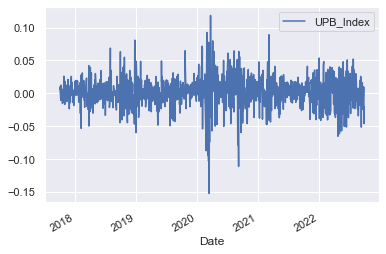

In [25]:
sum_return=max_sr_rts.sum(axis=1)
market_rts=pd.DataFrame(sum_return)
market_rts.columns=['UPB_Index']
market_rts.plot()

In [26]:
riskfree_rate=0.01
ark.summary_stats_day(r=market_rts, riskfree_rate=riskfree_rate)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
UPB_Index,0.451277,0.354966,-0.339505,7.391713,0.035163,0.051728,1.230891,-0.386018


In [27]:
ark.drawdown(sum_return).min()

Wealth            991.955228
Previous Peak    1006.913715
Drawdown           -0.386018
dtype: float64

In [45]:
r_total=r.copy()
r_total['UPB_Index']=market_rts.copy()
cov_total=r_total.cov()
cov_total

,AAPL,AMZN,ATVI,C,CAT,CSCO,DD,F,FDX,GM,GOOGL,MMM,MSFT,T,TSLA,TWTR,UPB_Index
AAPL,0.000419,0.000290,0.000192,0.000231,0.000180,0.000222,0.000210,0.000199,0.000219,0.000215,0.000268,0.000155,0.000294,0.000115,0.000382,0.000285,0.000373
AMZN,0.000290,0.000478,0.000202,0.000167,0.000153,0.000187,0.000158,0.000155,0.000207,0.000169,0.000282,0.000115,0.000294,0.000074,0.000371,0.000296,0.000318
ATVI,0.000192,0.000202,0.000491,0.000100,0.000111,0.000141,0.000093,0.000056,0.000130,0.000078,0.000181,0.000083,0.000199,0.000058,0.000215,0.000207,0.000201
C,0.000231,0.000167,0.000100,0.000582,0.000318,0.000235,0.000337,0.000370,0.000313,0.000405,0.000223,0.000228,0.000220,0.000209,0.000288,0.000267,0.000247
CAT,0.000180,0.000153,0.000111,0.000318,0.000428,0.000196,0.000298,0.000291,0.000265,0.000299,0.000185,0.000226,0.000174,0.000153,0.000190,0.000172,0.000182
CSCO,0.000222,0.000187,0.000141,0.000235,0.000196,0.000331,0.000210,0.000189,0.000209,0.000202,0.000200,0.000172,0.000222,0.000133,0.000210,0.000200,0.000218
DD,0.000210,0.000158,0.000093,0.000337,0.000298,0.000210,0.000500,0.000318,0.000259,0.000352,0.000195,0.000219,0.000195,0.000163,0.000240,0.000196,0.000216
F,0.000199,0.000155,0.000056,0.000370,0.000291,0.000189,0.000318,0.000674,0.000274,0.000517,0.000192,0.000198,0.000181,0.000177,0.000334,0.000232,0.000239
FDX,0.000219,0.000207,0.000130,0.000313,0.000265,0.000209,0.000259,0.000274,0.000555,0.000296,0.000209,0.000211,0.000207,0.000141,0.000273,0.000225,0.000234
GM,0.000215,0.000169,0.000078,0.000405,0.000299,0.000202,0.000352,0.000517,0.000296,0.000676,0.000229,0.000205,0.000207,0.000175,0.000358,0.000268,0.000261


In [46]:
cov_market=cov_total.iloc[16,:]
cov_market

AAPL         0.000373
AMZN         0.000318
ATVI         0.000201
C            0.000247
CAT          0.000182
CSCO         0.000218
DD           0.000216
F            0.000239
FDX          0.000234
GM           0.000261
GOOGL        0.000289
MMM          0.000144
MSFT         0.000330
T            0.000104
TSLA         0.000788
TWTR         0.000321
UPB_Index    0.000500
Name: UPB_Index, dtype: float64

In [47]:
constante=(r.mean()-riskfree_rate/360)/(cov_market)
constante

AAPL         3.325854
AMZN         2.803965
ATVI         1.821282
C           -0.283022
CAT          2.764744
CSCO         1.806067
DD          -1.133234
F            1.657613
FDX         -0.115054
GM           0.677068
GOOGL        2.407219
MMM         -1.923367
MSFT         3.345563
T           -0.904504
TSLA         3.469134
TWTR         3.982270
UPB_Index    3.404658
dtype: float64

## GRAFICAMOS EL MAPA DE TRANSICION

In [28]:
w_F=optimal_weigth['F']
w_TSLA=optimal_weigth['TSLA']
w_TWTR=optimal_weigth['TWTR']
w_MSFT=optimal_weigth['MSFT']
w_MMM=optimal_weigth['MMM']
w_T=optimal_weigth['T']
w_ATVI=optimal_weigth['ATVI']
w_GOOGL=optimal_weigth['GOOGL']
w_AMZN=optimal_weigth['AMZN']
w_CAT=optimal_weigth['CAT']
w_CSCO=optimal_weigth['CSCO']
w_C=optimal_weigth['C']
w_DD=optimal_weigth['DD']
w_FDX=optimal_weigth['FDX']
w_GM=optimal_weigth['GM']

In [29]:
weigths=ark.optimal_weights(10, er, cov)

In [30]:
vol_port=[ark.portfolio_vol(w, cov) for w in weigths]
vol_port

[0.35491305854192023,
 0.20210215812157434,
 0.20552031024390263,
 0.22173726775433755,
 0.24874613772191728,
 0.28692984346920386,
 0.33818291869544376,
 0.4192132666206483,
 0.5219246804424508,
 0.6399852567415699]

In [31]:
x_min=vol_port[5]
x_max=np.max(vol_port)

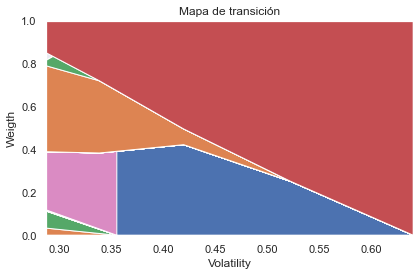

In [32]:
plt.stackplot(vol_port, w_F, w_TSLA, w_TWTR, w_MSFT, w_MMM, w_T, w_ATVI, 
              w_GOOGL, w_AMZN, w_CAT, w_CSCO, w_C, w_DD, w_FDX, w_GM)
plt.title("Mapa de transición")
plt.xlabel('Volatility')
plt.ylabel('Weigth')
plt.xlim((x_min, x_max))
plt.ylim((0, 1))
plt.tight_layout()
plt.show()